In [1]:
# 데이터 분석을 위한 pandas 수치계산을 위한 numpy 시각화를 위한 seaborn, matplotlib.pyplot를 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 3 데이터 셋 로드

In [2]:
df = pd.read_csv('file-path/data/diabetes_feature.csv')
df.shape

(768, 16)

In [3]:
# 데이터셋을 미리보기 합니다.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


# 4 학습과 예측에 사용할 데이터셋 만들기

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [5]:
x = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan',
       'low_glu_insulin']]
x.shape

(768, 9)

In [6]:
y= df['Outcome']
y.shape

(768,)

In [7]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
 x, y, test_size=0.2, random_state=42)

In [8]:
# train 세트의 문제와 정답의 데이터 수를 확인해주세요
x_train.shape, y_train.shape

((614, 9), (614,))

In [9]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

x_test.shape, y_test.shape

((154, 9), (154,))

# 5 학습과 예측하기

In [10]:
# DecisionTree를 불러 옵니다.
# random_state 를 지정해주면 값이 변하지 않는다.
# max_depth의 길이 조정을 통해 오차를 줄일 수 있다.

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 8,random_state=42,)
model

DecisionTreeClassifier(max_depth=8, random_state=42)

In [11]:
# 학습을 시킵니다.
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [12]:
feature_naems = x_train.columns.tolist()

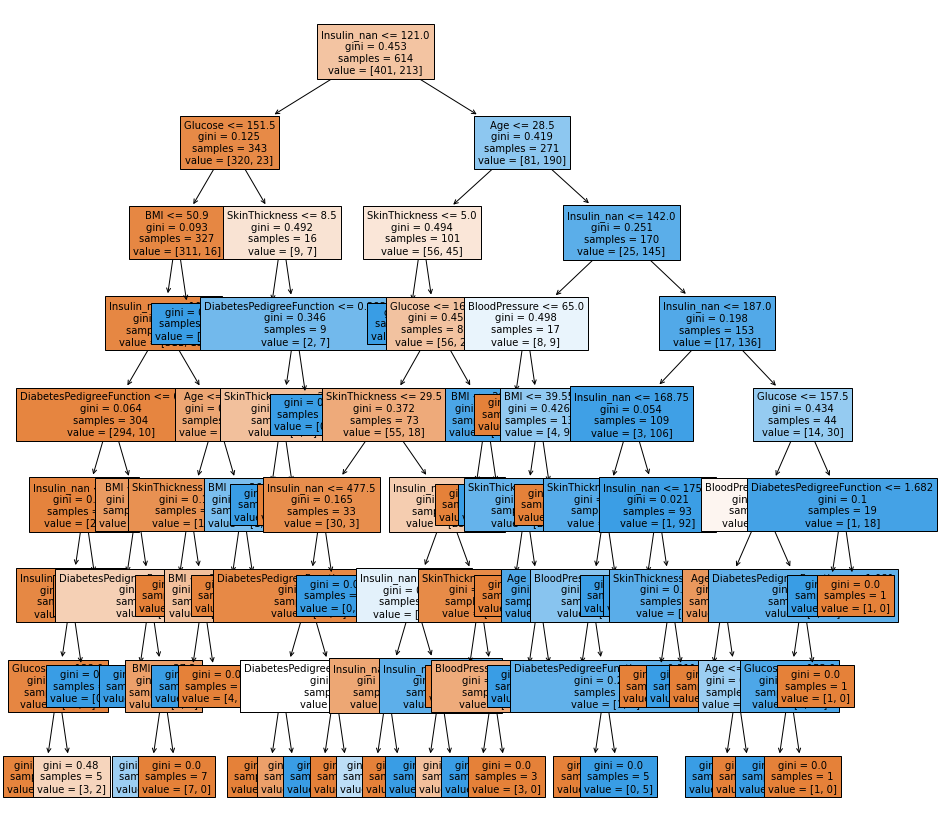

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
tree = plot_tree(model,feature_names = feature_naems,fontsize=10,filled=True)

In [14]:
#  예측을 하고 결과를 y_predict에 담습니다.
y_predict=model.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

# 6 정확도(Accuracy) 측정하기

In [15]:
# 다르게 예측한 갯수를 구해서 diff_count 에 할당해 줍니다.
# 지난번과는 테스트데이터와 훈련데이터를 나눠주는 방법이 바뀌었기 때문에 정확도 달라짐.
abs(y_predict - y_test).sum()

28

In [16]:
# accuracy score를 구합니다.

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)*100

81.81818181818183

# 최적의 max_depth 값 찾기
- 의사결정나무의 길이

In [17]:
for i in range(1,12):
    model = DecisionTreeClassifier(max_depth = i,random_state=42,)
    y_predict = model.fit(x_train,y_train).predict(x_test)
    score = accuracy_score(y_test, y_predict)*100
    print(i,score)

# max-dept가 4일때 가장 좋은 성능을 낸다

1 84.4155844155844
2 84.4155844155844
3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


# Grid Search
- 최적의 파라미터 값 찾기

In [18]:
# max_features 전체의 피쳐를 다 사용하지않고 몇 퍼센트를 사용할건지
# 크로스 밸리데이션을 5개의 조각으로 나눔

from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state = 42)
param_grid={"max_depth":range(3,12),
            "max_features":[0.3,0.5,0.7,0.9,1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1,  cv=5,verbose=1 )
clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

In [19]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    2.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

In [20]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [21]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [22]:
clf.best_score_

0.8664934026389444

In [23]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.008197,0.004853,0.002597,0.001066,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.006000,0.000898,0.004123,0.001692,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.007401,0.001961,0.004010,0.003032,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.004800,0.001167,0.001801,0.000756,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.004401,0.000583,0.002204,0.000935,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [24]:
clf.predict(x_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [25]:
clf.score(x_test,y_test)

0.8701298701298701

In [31]:
max_depth = np.random.randint(3,20,10)
max_depth

array([13, 13,  9,  7,  4,  4,  3,  9, 17, 15])

In [32]:
max_features = np.random.uniform(0.7,1.0,100)
max_features

array([0.96358692, 0.9250452 , 0.96156999, 0.90296403, 0.80666969,
       0.76639946, 0.72044771, 0.85056896, 0.93137104, 0.94064585,
       0.88721605, 0.90939391, 0.91811647, 0.70103082, 0.89745343,
       0.88439687, 0.76926316, 0.85678212, 0.96947728, 0.86891121,
       0.9085202 , 0.72424703, 0.83916282, 0.87946617, 0.76348309,
       0.80068375, 0.7868387 , 0.8636761 , 0.93960113, 0.76984619,
       0.94094678, 0.89674862, 0.97027777, 0.91319295, 0.99255156,
       0.95573303, 0.8123292 , 0.91258791, 0.79095793, 0.97578608,
       0.70132467, 0.78351037, 0.88674153, 0.86324598, 0.9069088 ,
       0.94092179, 0.74189193, 0.7058293 , 0.85161786, 0.97031591,
       0.92100018, 0.8112774 , 0.92911728, 0.96141727, 0.78590665,
       0.83654112, 0.90949343, 0.71191465, 0.8107869 , 0.82390773,
       0.76083602, 0.73496522, 0.99773675, 0.7465605 , 0.99061197,
       0.88993454, 0.81129702, 0.88310777, 0.98876687, 0.89406329,
       0.84464941, 0.83536124, 0.96163627, 0.73132601, 0.87156

In [33]:
param_distributions = {'max_depth': max_depth, 
                       'max_features' : max_features,
                       'min_sapmes_split' : list(range(2,7))
                      }
param_distributions

{'max_depth': array([13, 13,  9,  7,  4,  4,  3,  9, 17, 15]),
 'max_features': array([0.96358692, 0.9250452 , 0.96156999, 0.90296403, 0.80666969,
        0.76639946, 0.72044771, 0.85056896, 0.93137104, 0.94064585,
        0.88721605, 0.90939391, 0.91811647, 0.70103082, 0.89745343,
        0.88439687, 0.76926316, 0.85678212, 0.96947728, 0.86891121,
        0.9085202 , 0.72424703, 0.83916282, 0.87946617, 0.76348309,
        0.80068375, 0.7868387 , 0.8636761 , 0.93960113, 0.76984619,
        0.94094678, 0.89674862, 0.97027777, 0.91319295, 0.99255156,
        0.95573303, 0.8123292 , 0.91258791, 0.79095793, 0.97578608,
        0.70132467, 0.78351037, 0.88674153, 0.86324598, 0.9069088 ,
        0.94092179, 0.74189193, 0.7058293 , 0.85161786, 0.97031591,
        0.92100018, 0.8112774 , 0.92911728, 0.96141727, 0.78590665,
        0.83654112, 0.90949343, 0.71191465, 0.8107869 , 0.82390773,
        0.76083602, 0.73496522, 0.99773675, 0.7465605 , 0.99061197,
        0.88993454, 0.81129702, 0.883

In [34]:
# n_iter 10번을 돌리겠다
# scoring

from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                         param_distributions,
                         n_iter=100,
                         scoring='accuracy',
                         n_jobs=1,
                         cv=5,
                         random_state = 42)
    
    
    
                                                                   
                                                                   
                                                                   

In [ ]:
clf.get_params().keys()

In [ ]:
import state